# A Text Classification of Milwaukee Bucks's Fan Reactions

## Project Goal

The goal of this project is to evaluate the performances of different text classification methods on domain-specific social media data. The data used are comments from Milwaukee Bucks' fans in postgame Reddit threads. Models will be used to predict whether a comment follows a win or a loss. In doing so, one can get a better idea of how B

## Collecting and Preparing the Data

In [1]:
# Importing the Necessary Modules
from tqdm import tqdm
import pandas as pd
import numpy as np
# import praw
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import punkt

In [ ]:
# Accessing API
user_agent = "Scraper 1.0 by u/colloj"

reddit = praw.Reddit(client_id='-RlNNaCimqKKkJ_aX1FcKg',
                     client_secret='4vSZ7Dm4rtDYXevU8PtIiIK6dtD_Ng',
                     user_agent= user_agent)

In [ ]:
# Getting the Data
subreddit_name = 'MkeBucks'

# Define the string you want to search for in post titles
search_string = '[POSTGAME THREAD] Our Milwaukee Bucks'
start_date = '2023-10-23'

post_names = []
comments = []

for submission in reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene'):
    if '[POSTGAME THREAD]' in submission.title:
        print(submission.title)


In [ ]:
# Getting the Data
subreddit_name = 'MkeBucks'

# Define the string you want to search for in post titles
search_string = '[POSTGAME THREAD] Our Milwaukee Bucks'
start_date = '2023-10-23'

post_names = []
comments = []

total_submissions = len(list(reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene')))

for submission in tqdm(reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene'), total = total_submissions):
    if '[POSTGAME THREAD]' in submission.title:
        submission.comments.replace_more(limit=None)
        for comment in submission.comments.list():
            comments.append(comment.body)
            post_names.append(submission.title)

post_names, comments

In [ ]:
# Create a DataFrame from the lists
df = pd.DataFrame({'Post_Name': post_names, 'Comment': comments})

# Display the DataFrame
df.head()

In [ ]:
df.to_csv("bucks.csv", index = False)

In [2]:
df = pd.read_csv("bucks.csv")
df.head()

,Post_Name,Comment
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they..."
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh..."


In [3]:
# Getting the Dates
def get_after_last_space(string):
    return string.split(' ')[-1]
df["Date"] = df["Post_Name"].apply(get_after_last_space)
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,1/3/2024
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,1/3/2024
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",1/3/2024
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,1/3/2024
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",1/3/2024


In [4]:
df["Date"].unique()

array(['1/3/2024', '3/4/2024', '2/15/2024', '10/26/2023', '1/31/2024',
       '3/8/2024', '3/10/2024', '11/1/2023', '11/8/2023', '1/6/2024',
       '1/27/2024', '2/03/2024', '11/6/2023', '1/8/2024', '1/11/2024',
       '2/25/2024', '2/23/2024', '11/11/2023', '3/14/2024', '1/14/2024',
       '11/22/2023', '1/4/2024', '11/18/2023', '11/24/2023', '2/04/2024',
       '3/1/2024', '1/1/2024', '3/12/2024', '04/26/2023', '1/24/2024',
       '2/12/2024', '12/11/2023', '10/20/2023', '2/13/2024', '2/8/2024',
       '11/9/2023', '12/23/2023', '3/6/2024', '11/28/2023', '11/30/2023',
       '1/20/2024', '2/27/2024', '12/13/2023', '11/15/2023', '1/13/2024',
       '11/17/2023', '12/2/2023', '12/17/2023', '12/27/2023', '2/06/2024',
       '10/29/2023', '12/29/2023', '1/17/2024', '11/26/2023',
       '12/21/2023', '11/20/2023', '1/22/2024', '1/26/2024', '04/24/2023',
       '12/19/2023', '12/16/2023', '2/9/2024', '2/29/2024', '11/13/2023',
       '04/22/2023', '04/19/2023', '11/3/2023', '04/16/2023', '

In [5]:
df = df[df["Date"] != "round"]
df["Date"].unique()

array(['1/3/2024', '3/4/2024', '2/15/2024', '10/26/2023', '1/31/2024',
       '3/8/2024', '3/10/2024', '11/1/2023', '11/8/2023', '1/6/2024',
       '1/27/2024', '2/03/2024', '11/6/2023', '1/8/2024', '1/11/2024',
       '2/25/2024', '2/23/2024', '11/11/2023', '3/14/2024', '1/14/2024',
       '11/22/2023', '1/4/2024', '11/18/2023', '11/24/2023', '2/04/2024',
       '3/1/2024', '1/1/2024', '3/12/2024', '04/26/2023', '1/24/2024',
       '2/12/2024', '12/11/2023', '10/20/2023', '2/13/2024', '2/8/2024',
       '11/9/2023', '12/23/2023', '3/6/2024', '11/28/2023', '11/30/2023',
       '1/20/2024', '2/27/2024', '12/13/2023', '11/15/2023', '1/13/2024',
       '11/17/2023', '12/2/2023', '12/17/2023', '12/27/2023', '2/06/2024',
       '10/29/2023', '12/29/2023', '1/17/2024', '11/26/2023',
       '12/21/2023', '11/20/2023', '1/22/2024', '1/26/2024', '04/24/2023',
       '12/19/2023', '12/16/2023', '2/9/2024', '2/29/2024', '11/13/2023',
       '04/22/2023', '04/19/2023', '11/3/2023', '04/16/2023'],


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03


In [7]:
# Getting Data For This Season
df = df[df["Date"] >= "2023-10-26"]
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03


In [8]:
# Number of Games
len(df["Post_Name"].unique())

64

In [9]:
# Number of Columns
len(df)

12266

In [10]:
# Create the Result Column
def label_column(string):
    if any(word in string for word in ["defeat", "trounce", "beat"]):
        return "Win"
    elif any(word in string for word in ["fall", "sputter", "are defeated"]):
        return "Loss"
    else:
        return "Unknown"
df["Result"] = df["Post_Name"].apply(label_column)
df.head()

,Post_Name,Comment,Date,Result
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03,Loss
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03,Loss
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03,Loss
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03,Loss
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03,Loss


In [11]:
# Sorting Dataframe By Date
df = df.sort_values(by = "Date").reset_index(drop = True)

In [12]:
df.head()

,Post_Name,Comment,Date,Result
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win


### Prepare Comments for Modeling

In [13]:
# Tokenize, then rejoin
def tokenize(document):
    # YOUR CODE HERE
    document = document.split()
    
    for item in document:
        document = [re.sub(r'^\W+|\W+$', "", item) for item in document]
            
    document = [item.lower() for item in document]
    
    document = " ".join(document)
    
    return document

df["Comment_Adj"] = df["Comment"].apply(tokenize)
df.head()

,Post_Name,Comment,Date,Result,Comment_Adj
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,but have you considered damian lillard
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,help yourself to a dame flair
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,the most casual 30 point games in the nba ther...
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,dame regularly went nuclear with the most medi...
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,wait until you see him get hot from 3 and star...


In [14]:
# Remove Stopwords from Comments
def remove_stopwords(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df["No_Stop"] = df["Comment_Adj"].apply(remove_stopwords)
df.head()

,Post_Name,Comment,Date,Result,Comment_Adj,No_Stop
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,but have you considered damian lillard,considered damian lillard
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,help yourself to a dame flair,help dame flair
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,the most casual 30 point games in the nba ther...,casual 30 point games nba ’ good reason ’ obse...
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,dame regularly went nuclear with the most medi...,dame regularly went nuclear mediocre teams bla...
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,wait until you see him get hot from 3 and star...,wait see get hot 3 start shooting 35-40 ft sho...


In [15]:
# Perform Stemming on Comments
stemmer = PorterStemmer()
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming function to text_column
df['Stemmed'] = df['No_Stop'].apply(stem_text)
df.head()

,Post_Name,Comment,Date,Result,Comment_Adj,No_Stop,Stemmed
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,but have you considered damian lillard,considered damian lillard,consid damian lillard
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,help yourself to a dame flair,help dame flair,help dame flair
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,the most casual 30 point games in the nba ther...,casual 30 point games nba ’ good reason ’ obse...,casual 30 point game nba ’ good reason ’ obses...
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,dame regularly went nuclear with the most medi...,dame regularly went nuclear mediocre teams bla...,dame regularli went nuclear mediocr team blaze...
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,wait until you see him get hot from 3 and star...,wait see get hot 3 start shooting 35-40 ft sho...,wait see get hot 3 start shoot 35-40 ft shot l...


In [16]:
# Win_Loss Function

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Result_Bin'] = label_encoder.fit_transform(df['Result'])
df.head()

,Post_Name,Comment,Date,Result,Comment_Adj,No_Stop,Stemmed,Result_Bin
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,but have you considered damian lillard,considered damian lillard,consid damian lillard,1
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,help yourself to a dame flair,help dame flair,help dame flair,1
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,the most casual 30 point games in the nba ther...,casual 30 point games nba ’ good reason ’ obse...,casual 30 point game nba ’ good reason ’ obses...,1
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,dame regularly went nuclear with the most medi...,dame regularly went nuclear mediocre teams bla...,dame regularli went nuclear mediocr team blaze...,1
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,wait until you see him get hot from 3 and star...,wait see get hot 3 start shooting 35-40 ft sho...,wait see get hot 3 start shoot 35-40 ft shot l...,1


## Naive Bayes Model 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB

X = df["Stemmed"]
y = df["Result_Bin"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
BNB = make_pipeline(CountVectorizer(), BernoulliNB())

In [34]:
# Train and test the model

BNB.fit(X_train, y_train)

# Predict on the test set
y_pred = BNB.predict(X_test)

# Calculate accuracy
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6985769728331178


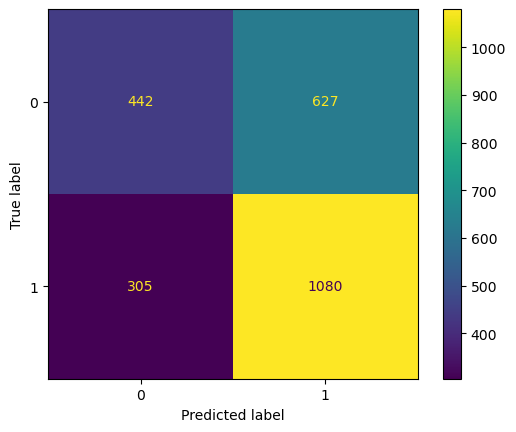

In [35]:
# Print the Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [36]:
# Print TPR, FPR, Precision, Recall

TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]

tpr = round(100 *(TP / (TP + FN)), 2)
display(tpr)
fpr = round(100* (FP / (FP + TN)), 2)
display(fpr)
precision = round(100*(TP / (TP + FP)),2)
display(precision)

77.98

58.65

63.27

In [49]:
df_test = pd.DataFrame(X_test)
df_test["Actual_Label"] = y_test
df_test["Pred_Label"] = y_pred
probs = BNB.predict_proba(X_test)
df_test['predict_proba'] = [probs[i][1] for i in range(len(probs))]
df_test

,Stemmed,Actual_Label,Pred_Label,predict_proba
3116,lmao thank,1,1,0.981377
3721,fkl,1,1,0.969936
2943,defens adjust frustrat celtic,0,1,0.916624
8446,well odd dame least hit first increas miss sec...,0,1,0.574565
5282,heat fan twice bet gianni come piss call giann...,0,0,0.175973
...,...,...,...,...
4863,spur,1,1,0.986595
4519,fuck go,1,1,0.957687
4303,con-naughton,1,1,0.987552
11002,yeah wonder would close danilo better switch o...,1,0,0.424276


In [58]:
test_full = pd.merge(df_test, df, on = "Stemmed", how = "left")
test_full = test_full[["Comment", "Stemmed", "Actual_Label", "Pred_Label", "predict_proba"]]
test_full.head()

,Comment,Stemmed,Actual_Label,Pred_Label,predict_proba
0,Lmao thanks,lmao thank,1,1,0.981377
1,FKL,fkl,1,1,0.969936
2,What were the defensive adjustments that frust...,defens adjust frustrat celtic,0,1,0.916624
3,Well the odds of Dame at least hitting the fir...,well odd dame least hit first increas miss sec...,0,1,0.574565
4,And the Heat fan who twice now has bet on Gian...,heat fan twice bet gianni come piss call giann...,0,0,0.175973
...,...,...,...,...,...
5460,or the spurs,spur,1,1,0.986595
5461,What the fuck is going on out there?,fuck go,1,1,0.957687
5462,Con-naughton,con-naughton,1,1,0.987552
5463,"Yeah, I was wondering if they would close it o...",yeah wonder would close danilo better switch o...,1,0,0.424276


In [61]:
fp_df = test_full[(test_full["Actual_Label"] == 0) & (test_full["Pred_Label"] == 1)].sort_values(by = "predict_proba", ascending = False)
fp_df.head()

,Comment,Stemmed,Actual_Label,Pred_Label,predict_proba
2268,"Real question, will Thanasis hop on the Pat Be...",real question thanasi hop pat bev podcast pat ...,0,1,0.998701
753,![img](emote|t5_2t10o|24578),img ] ( emote|t5_2t10o|24578,0,1,0.998215
754,![img](emote|t5_2t10o|24578),img ] ( emote|t5_2t10o|24578,0,1,0.998215
636,Glad I spent $ on courtside for that lol oops!...,glad spent courtsid lol oop 7.5 min bonu attac...,0,1,0.997157
5118,Love when MJ is a Bucks hater lol you know it ...,love mj buck hater lol know come heart,0,1,0.995318


In [63]:
fn_df = test_full[(test_full["Actual_Label"] == 1) & (test_full["Pred_Label"] == 0)].sort_values(by = "predict_proba")
fn_df.head()

,Comment,Stemmed,Actual_Label,Pred_Label,predict_proba
2197,That series is by far my biggest what-if of th...,seri far biggest what-if bud era think say cle...,1,0,8.207599e-16
3972,I think there are a few really big takeaways f...,think realli big takeaway game someth mention ...,1,0,1.577316e-13
2426,Khris they say it was sore Achilles. Not sure ...,khri say sore achil sure mean 's precautionari...,1,0,1.021511e-09
4674,Dame man. Never stops being insane how he can ...,dame man never stop insan fuckin turn aim bot ...,1,0,1.235395e-09
2252,"This is sheer delusion, I’m sorry. \n\nThe 20t...",sheer delus ’ sorri 20th rank defens nba net g...,1,0,1.694379e-09


## Logistic Regression Model 

In [69]:
vec = CountVectorizer()
X_train_1 = vec.fit_transform(X_train)
X_test_1 = vec.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_1, y_train)
y_pred_lr = lr.predict(X_test_1)

f1 = f1_score(y_test, y_pred_lr)
print("F1 Score:", f1)

F1 Score: 0.6874343717185859


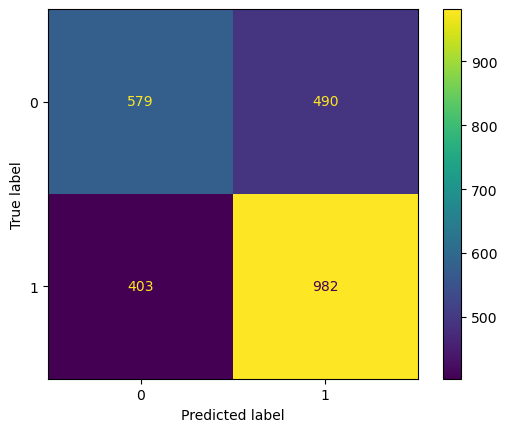

In [71]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [73]:
# TPR, FPR, Precision

TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]

tpr = TP / (TP + FN)
display(tpr)
fpr = FP / (FP + TN)
display(fpr)
precision = TP / (TP + FP)
display(precision)


0.7090252707581227

0.4583723105706268

0.6671195652173914

In [75]:
# "Most Wrong" Negative Comments
df_test = pd.DataFrame(X_test)
df_test["Actual_Label"] = y_test
df_test["Pred_Label"] = y_pred_lr
probs = lr.predict_proba(X_test_1)
df_test['predict_proba'] = [probs[i][1] for i in range(len(probs))]
df_test

,Stemmed,Actual_Label,Pred_Label,predict_proba
3116,lmao thank,1,1,0.724096
3721,fkl,1,1,0.606038
2943,defens adjust frustrat celtic,0,1,0.709577
8446,well odd dame least hit first increas miss sec...,0,0,0.264181
5282,heat fan twice bet gianni come piss call giann...,0,0,0.191379
...,...,...,...,...
4863,spur,1,1,0.805416
4519,fuck go,1,1,0.596010
4303,con-naughton,1,1,0.759353
11002,yeah wonder would close danilo better switch o...,1,1,0.969756


In [76]:
test_full = pd.merge(df_test, df, on = "Stemmed", how = "left")
test_full = test_full[["Comment", "Stemmed", "Actual_Label", "Pred_Label", "predict_proba"]]
test_full.head()

,Comment,Stemmed,Actual_Label,Pred_Label,predict_proba
0,Lmao thanks,lmao thank,1,1,0.724096
1,FKL,fkl,1,1,0.606038
2,What were the defensive adjustments that frust...,defens adjust frustrat celtic,0,1,0.709577
3,Well the odds of Dame at least hitting the fir...,well odd dame least hit first increas miss sec...,0,0,0.264181
4,And the Heat fan who twice now has bet on Gian...,heat fan twice bet gianni come piss call giann...,0,0,0.191379


In [77]:
fp_df = test_full[(test_full["Actual_Label"] == 0) & (test_full["Pred_Label"] == 1)].sort_values(by = "predict_proba", ascending = False)
fp_df.head()

,Comment,Stemmed,Actual_Label,Pred_Label,predict_proba
243,I will be messaging you in 5 months on [**2024...,messag 5 month 2024-04-02 02:29:31 utc * * ] (...,0,1,0.999998
4375,"I love Dame, but he needs to stop differing an...",love dame need stop differ put dick tabl run t...,0,1,0.993571
999,Im convinced marjon and ajax are riding the be...,im convinc marjon ajax ride bench potenti gift...,0,1,0.993130
2959,I can’t complain . Let him play and get confid...,’ complain let play get confid bench underperf...,0,1,0.989628
4468,No one wanted to win on the court more than Da...,one want win court dame last 5 minut superb fu...,0,1,0.987161


In [78]:
fn_df = test_full[(test_full["Actual_Label"] == 1) & (test_full["Pred_Label"] == 0)].sort_values(by = "predict_proba")
fn_df.head()

,Comment,Stemmed,Actual_Label,Pred_Label,predict_proba
2197,That series is by far my biggest what-if of th...,seri far biggest what-if bud era think say cle...,1,0,7.558619e-07
2826,I would gladly trade all the downers here. One...,would gladli trade downer one bad game request...,1,0,2.647902e-03
2427,There were also a few fast breaks that Dame an...,also fast break dame khri led bounc ball backw...,1,0,3.137630e-03
2252,"This is sheer delusion, I’m sorry. \n\nThe 20t...",sheer delus ’ sorri 20th rank defens nba net g...,1,0,5.256516e-03
3112,just literally could never break away from the...,liter could never break away also sad brook co...,1,0,1.319801e-02


## Convolutional Neural Network

#### Hyperparameter Tuning

In [85]:
# Importing the Necessary Libraries
import tensorflow as tf
import keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout

In [86]:
# Tokenizing the Dataset
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_2 = tokenizer.texts_to_sequences(X_train)
X_test_2 = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200
X_train_2 = pad_sequences(X_train_2, padding='post', maxlen=maxlen)
X_test_2 = pad_sequences(X_test_2, padding='post', maxlen=maxlen)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

### Overfitted Model

In [96]:
# Building the initial model
def CNN_model(embedding = 200, filter = 16, kernel = 4, num_1 = 40, lr = 0.01, dropout_rate = 0.5):
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                               output_dim=embedding, 
                               input_length=maxlen))
    model.add(Conv1D(filters = filter, kernel_size = kernel, activation = "relu"))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_1, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer= Adam(learning_rate = lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = CNN_model()

history = model.fit(X_train_2, y_train,
                    epochs=30,
                    verbose=False,
                    validation_data=(X_test_2, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train_2, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_2, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9749
Testing Accuracy:  0.6214


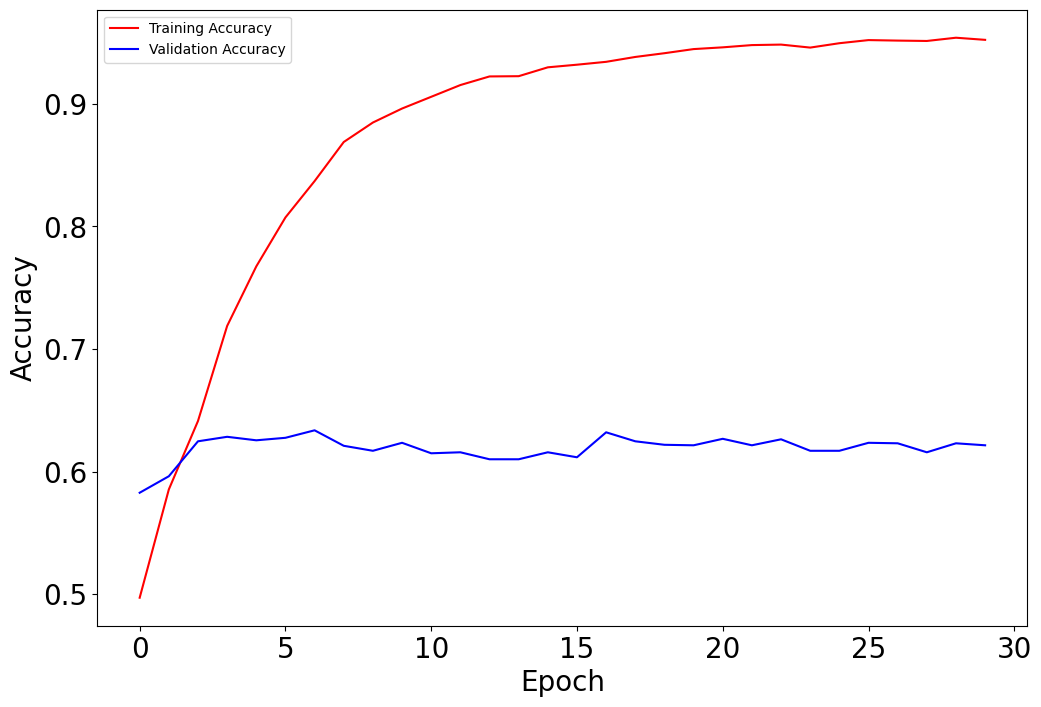

In [97]:
# Plot Accuracy Over Number of Epochs

fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(history.history['accuracy'], 'r', label='Training Accuracy')
ax.plot(history.history['val_accuracy'], 'b' ,label='Validation Accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [28]:
# Performing GridSearch

from sklearn.model_selection import GridSearchCV

def CNN_model(embedding = 200, filter = 16, kernel = 4, num_1 = 40, lr = 0.01, dropout_rate = 0.5):
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                               output_dim=embedding, 
                               input_length=maxlen))
    model.add(Conv1D(filters = filter, kernel_size = kernel, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_1, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer= Adam(learning_rate = lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = CNN_model()

param_grid = {
    'filter': [24, 36],
    'kernel': [4,5,6],
    'num_1': [60, 80, 100],
    'lr': [0.01, 0.001],
    'dropout_rate': [0.4, 0.5, 0.6]
}

model = KerasClassifier(build_fn=CNN_model, verbose=0)

# Perform GridSearchCV
search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose = 2)
search_results = search.fit(X_train_2, y_train)

# Get the best score and best parameters
best_score = search_results.best_score_
best_params = search_results.best_params_

print("Best score is {:.2f} using {}".format(best_score, best_params))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/var/folders/hs/br_4rpdj68nc3sfdpgv0xgn80000gn/T/ipykernel_74732/2346769631.py:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=CNN_model, verbose=0)
2024-04-18 08:48:32.894289: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 08:48:32.894792: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 08:48:32.901589: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 08:48:32.902734: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 08:48:32.903000: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 08:48:32.904463: W tensorflow/tsl/platform/profile_utils

103/103 [==============================] - 2s 14ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.01, num_1=60; total time=  23.7s
103/103 [==============================] - 1s 9ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.01, num_1=100; total time=  23.4s
103/103 [==============================] - 1s 11ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.001, num_1=100; total time=  22.1s
103/103 [==============================] - 2s 22ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=5, lr=0.01, num_1=80; total time=  24.6s
103/103 [==============================] - 1s 11ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=5, lr=0.01, num_1=100; total time=  26.6s
103/103 [==============================] - 2s 15ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=5, lr=0.001, num_1=80; total time=  28.3s
103/103 [==============================] - 3s 21ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=6, lr=0.01, num_1=60; total time=  29.4s
10

In [30]:
# Evaluate performance of new model (why is test accuracy lower?)

best_model = CNN_model(num_1 = 100, lr = 0.001,
                      kernel = 6, filter = 24, dropout_rate = 0.4)

history = best_model.fit(X_train_2, y_train,
                    epochs=30,
                    verbose=False,
                    validation_data=(X_test_2, y_test),
                    batch_size=1000)

# Evaluate the model on the test data

loss, accuracy = best_model.evaluate(X_train_2, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = best_model.evaluate(X_test_2, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9899
Testing Accuracy:  0.6092


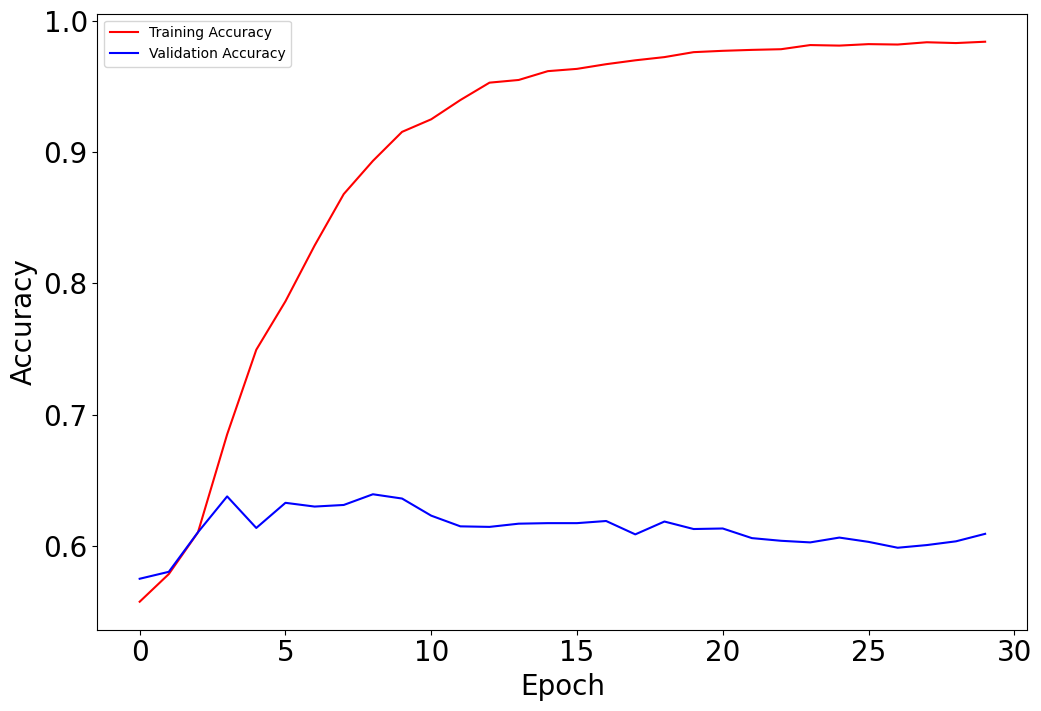

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(history.history['accuracy'], 'r', label='Training Accuracy')
ax.plot(history.history['val_accuracy'], 'b' ,label='Validation Accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Adjusted Model

In [98]:
# Building a model that avoids overfitting

from keras.regularizers import l2
from keras.callbacks import EarlyStopping

def CNN_model_adj(embedding=200, filter=16, kernel=4, num_1=40, lr=0.01, dropout_rate=0.5):
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                               output_dim=embedding, 
                               input_length=maxlen))
    model.add(Conv1D(filters=filter, kernel_size=kernel, activation="relu"))
    model.add(MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_1, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_adj = CNN_model_adj()

history_adj = model_adj.fit(X_train_2, y_train,
                    epochs=30,
                    verbose=False,
                    validation_data=(X_test_2, y_test),
                    batch_size=1000,
                    callbacks=[early_stopping])  

loss, accuracy = model_adj.evaluate(X_train_2, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_adj.evaluate(X_test_2, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7781
Testing Accuracy:  0.6333


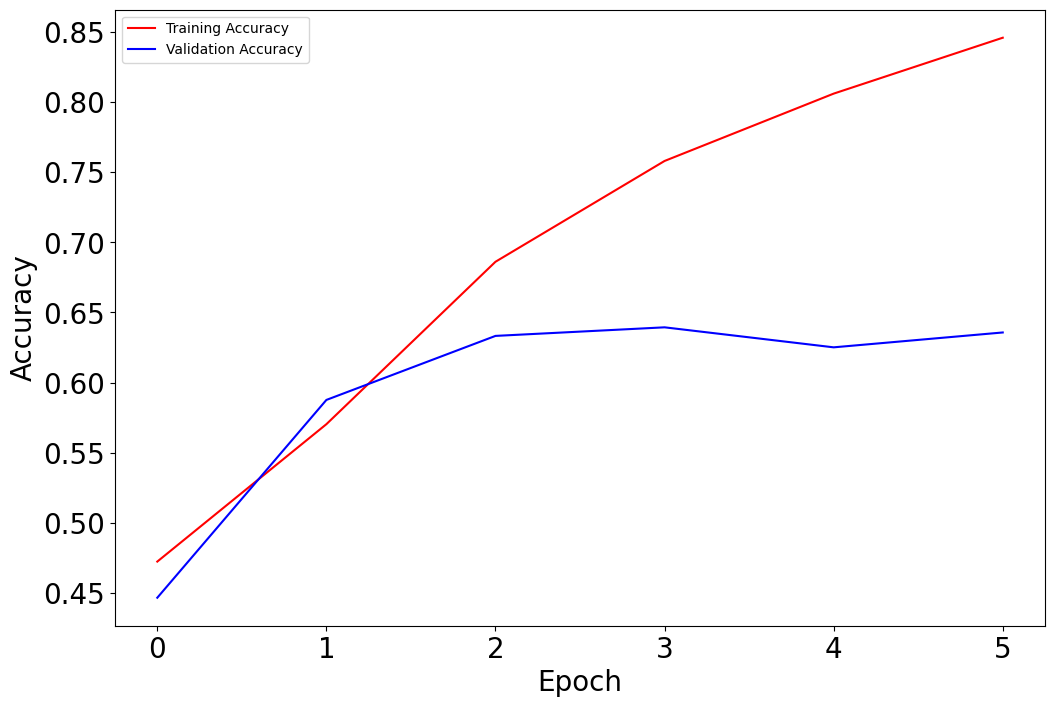

In [99]:
# Accuracy over epochs

fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(history_adj.history['accuracy'], 'r', label='Training Accuracy')
ax.plot(history_adj.history['val_accuracy'], 'b' ,label='Validation Accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [92]:
# Gridsearch

def CNN_model_adj(embedding=200, filter=16, kernel=4, num_1=40, lr=0.01, dropout_rate=0.5):
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                               output_dim=embedding, 
                               input_length=maxlen))
    model.add(Conv1D(filters=filter, kernel_size=kernel, activation="relu"))
    model.add(MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_1, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

param_grid = {
    'filter': [24, 36],
    'kernel': [4,5,6],
    'num_1': [60, 80, 100],
    'lr': [0.01, 0.001],
    'dropout_rate': [0.4, 0.5, 0.6]
}

model_adj = KerasClassifier(build_fn=CNN_model_adj, verbose=0)

# Perform GridSearchCV
search = GridSearchCV(estimator=model_adj, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose = 2)
search_results = search.fit(X_train_2, y_train)

# Get the best score and best parameters
best_score = search_results.best_score_
best_params = search_results.best_params_

print("Best score is {:.2f} using {}".format(best_score, best_params))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/var/folders/hs/br_4rpdj68nc3sfdpgv0xgn80000gn/T/ipykernel_78730/4022294683.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_adj = KerasClassifier(build_fn=CNN_model_adj, verbose=0)
2024-04-18 13:49:05.642775: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 13:49:05.642798: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 13:49:05.642788: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 13:49:05.645046: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 13:49:05.645439: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 13:49:05.652489: W tensorflow/tsl/platform/profi

103/103 [==============================] - 2s 12ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.01, num_1=80; total time=  23.9s
103/103 [==============================] - 2s 16ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.01, num_1=60; total time=  25.1s
103/103 [==============================] - 3s 26ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.001, num_1=60; total time=  24.6s
103/103 [==============================] - 3s 26ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.01, num_1=100; total time=  25.0s
103/103 [==============================] - 2s 14ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.001, num_1=80; total time=  25.7s
103/103 [==============================] - 2s 14ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.001, num_1=100; total time=  25.0s
103/103 [==============================] - 3s 24ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=5, lr=0.01, num_1=60; total time=  27.0s
1

In [100]:
# Why is accuracy lower?

best_model_adj = CNN_model_adj(num_1 = 80, lr = 0.001,
                      kernel = 5, filter = 36, dropout_rate = 0.5)

history = best_model_adj.fit(X_train_2, y_train,
                    epochs=30,
                    verbose=False,
                    validation_data=(X_test_2, y_test),
                    batch_size=1000)

# Evaluate the model on the test data
loss, accuracy = best_model_adj.evaluate(X_train_2, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = best_model_adj.evaluate(X_test_2, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9886
Testing Accuracy:  0.6002


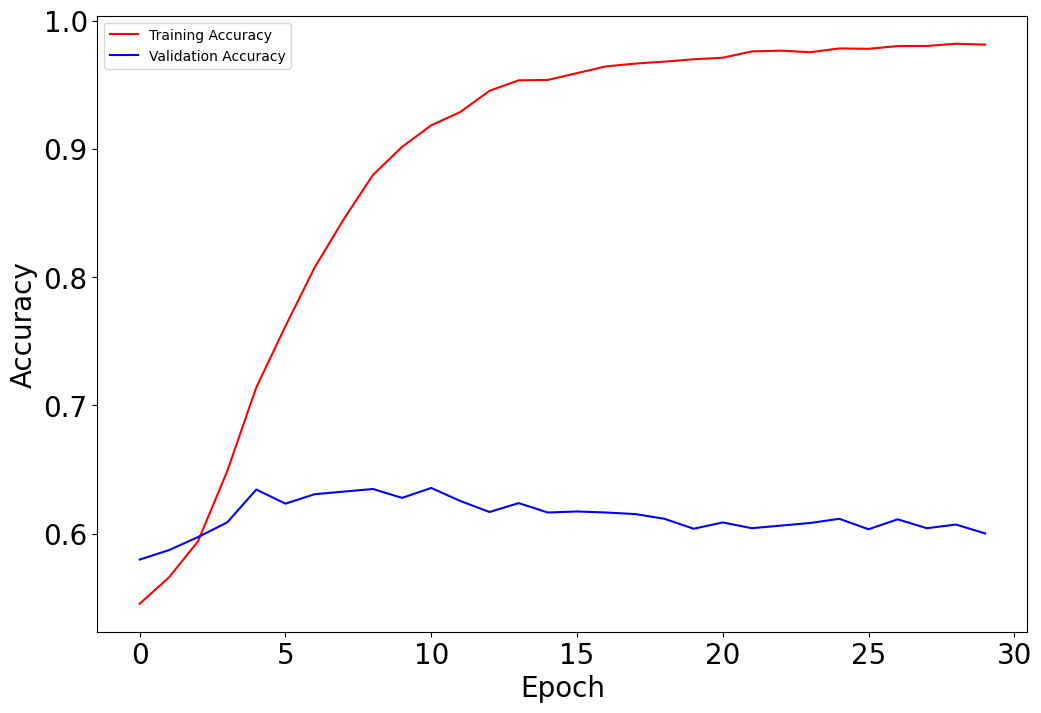

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(history.history['accuracy'], 'r', label='Training Accuracy')
ax.plot(history.history['val_accuracy'], 'b' ,label='Validation Accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)